# Machine Learning Tutorial

Based on [this tutorial](https://github.com/amitkaps/full-stack-data-science) given at Europython 2017.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Intro

Bank XYZ is in the business of giving personal loans, structured as [non-recourse loans](http://www.investopedia.com/terms/n/nonrecoursedebt.asp). The defaults on their loans are much higher than their competitors. Also, the underlying collaterals lose their value way too quicky and has resulted in huge losses for Bank XYZ.

Alice was recently appointed as the Senior VP of the Risk Organization. She comes from a strong analytics background and wants to leverage data science to identify customer's risk before approving loan.

She's appointed you as a consultant to help her and the team solve this problem.


*Note: This case study was inspired by the [bank marketing case study](https://archive.ics.uci.edu/ml/datasets/bank+marketing). The data is a modified version of what is available in that site*

The first step is to convert the business problem into an analytics problem

Alice wants to know customer's risk. Let's try to predict the propensity of a customer to default, given the details he/she has entered on the loan application form

After discussions with the IT team of Startup XYZ, you have obtained some historical data from the bank. It has the following columns

**Application Attributes**:
- `years`: Number of years the applicant has been employed  
- `ownership`: Whether the applicant owns a house or not  
- `income`:  Annual income of the applicant  
- `age`: Age of the applicant  
- `amount` : Amount of Loan requested by the applicant  

**Behavioural Attributes**:
- `grade`:  Credit grade of the applicant

**Outcome Variable**:

- `default` : Whether the applicant has defaulted or not 

## Load data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df = pd.read_csv("../data/historical_loan.csv")

In [5]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.00,RENT,19200.00,24
1,1,6500,A,2.00,MORTGAGE,66000.00,28
2,0,2400,A,2.00,RENT,60000.00,36
3,0,10000,C,3.00,RENT,62000.00,24
4,1,4000,C,2.00,RENT,20000.00,28


In [6]:
len(df)

7727

In [7]:
df.columns

Index(['default', 'amount', 'grade', 'years', 'ownership', 'income', 'age'], dtype='object')

In [8]:
df.dtypes

default        int64
amount         int64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

In [9]:
df.shape

(7727, 7)

In [10]:
df.describe()

,default,amount,years,income,age
count,7727.00,7727.00,7448.00,7727.00,7727.00
mean,0.48,9453.35,6.09,63371.97,27.54
std,0.50,6298.60,6.70,46871.95,6.13
min,0.00,500.00,0.00,4000.00,20.00
25%,0.00,5000.00,2.00,37000.00,23.00
50%,0.00,8000.00,4.00,54000.00,26.00
75%,1.00,12000.00,8.00,76796.50,30.00
max,1.00,35000.00,62.00,1200000.00,94.00


## Missing values

In [11]:
df.isnull().head()

,default,amount,grade,years,ownership,income,age
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [13]:
df.years = df.years.fillna(np.mean(df.years))

In [14]:
pd.unique(df.years)

array([  2.       ,   3.       ,   1.       ,   6.       ,   4.       ,
         0.       ,  16.       ,  12.       ,  11.       ,  15.       ,
         6.0863319,  18.       ,   8.       ,   7.       ,  34.       ,
         9.       ,  14.       ,   5.       ,  10.       ,  20.       ,
        26.       ,  19.       ,  24.       ,  61.       ,  27.       ,
        21.       ,  13.       ,  30.       ,  23.       ,  22.       ,
        31.       ,  25.       ,  17.       ,  38.       ,  28.       ,
        29.       ,  56.       ,  47.       ,  45.       ,  43.       ,
        32.       ,  33.       ,  36.       ,  40.       ,  44.       ,
        53.       ,  41.       ,  55.       ,  62.       ,  48.       ,
        37.       ,  35.       ])

## Exploration

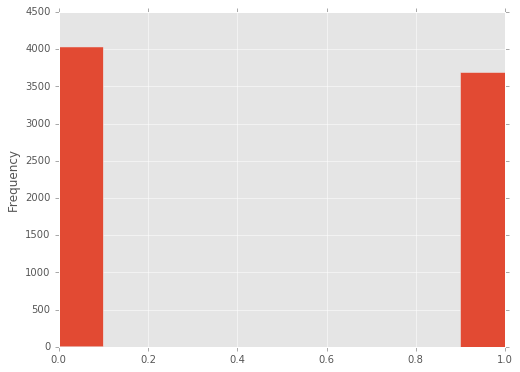

In [15]:
df.default.plot.hist()

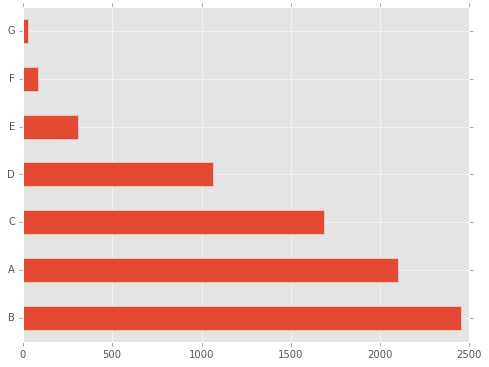

In [16]:
df.grade.value_counts().plot.barh()

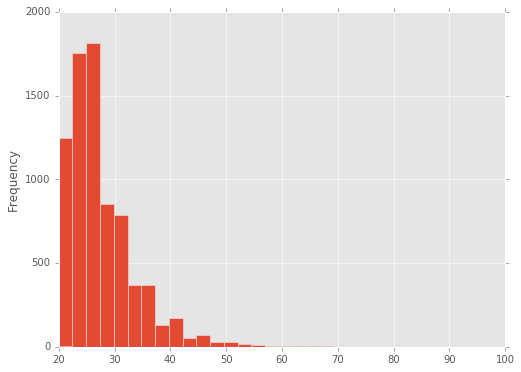

In [17]:
df.age.plot.hist(bins=30)

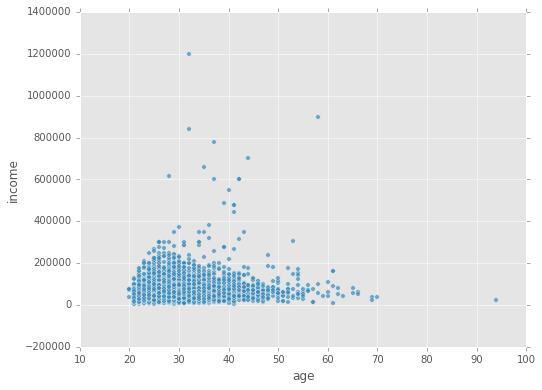

In [18]:
df.plot.scatter(x='age', y='income', alpha=0.7)

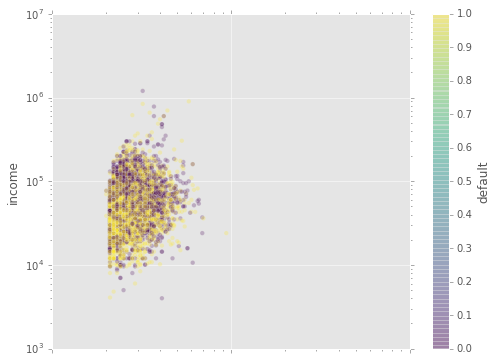

In [19]:
# Explore the relationship between age, income and default
df.plot.scatter(x='age', y='income', c='default', logx=True, logy=True, alpha=0.25,
                cmap='viridis')

## Categorical variables

In [20]:
df_encoded = df.copy()

In [21]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded.grade, prefix='grade')], axis=1)
df_encoded.drop('grade', inplace=True, axis=1)

In [22]:
df_encoded.head()

,default,amount,years,ownership,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1000,2.00,RENT,19200.00,24,0,1,0,0,0,0,0
1,1,6500,2.00,MORTGAGE,66000.00,28,1,0,0,0,0,0,0
2,0,2400,2.00,RENT,60000.00,36,1,0,0,0,0,0,0
3,0,10000,3.00,RENT,62000.00,24,0,0,1,0,0,0,0
4,1,4000,2.00,RENT,20000.00,28,0,0,1,0,0,0,0


In [23]:
df.ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [24]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded.ownership, prefix='ownership')],
                       axis=1)
df_encoded.drop('ownership', inplace=True, axis=1)

In [25]:
X = df_encoded[['age', 'amount']]
y = df_encoded['default']

## Decision trees

In [26]:
from sklearn import tree

In [27]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

In [28]:
import pydotplus 
from IPython.display import Image

In [29]:
dot_data = tree.export_graphviz(clf, out_file='tree_3.dot', feature_names=X.columns,
                                class_names=['no', 'yes'], filled=True, 
                                rounded=True, special_characters=True)

In [30]:
graph = pydotplus.graph_from_dot_file('tree_3.dot')  

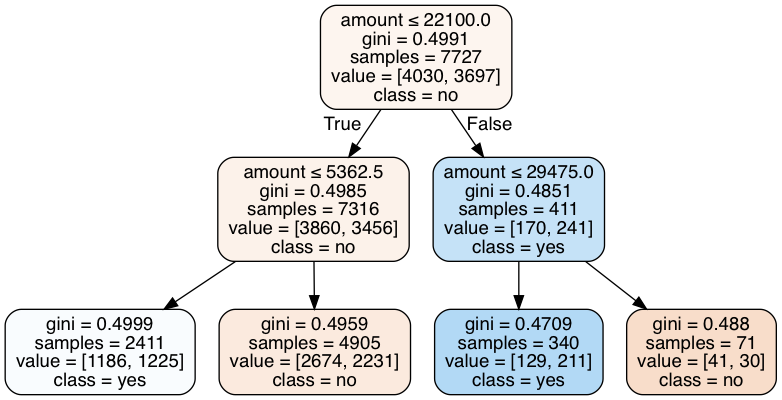

In [31]:
Image(graph.create_png()) 

Let's see the decision boundaries

In [32]:
def plot_boundaries(X, clf):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/100), 
                         np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    target = clf.predict(X)
    plt.scatter(x = X.iloc[:,0], y = X.iloc[:,1], c = y, s = 20, cmap=plt.cm.magma)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.4)

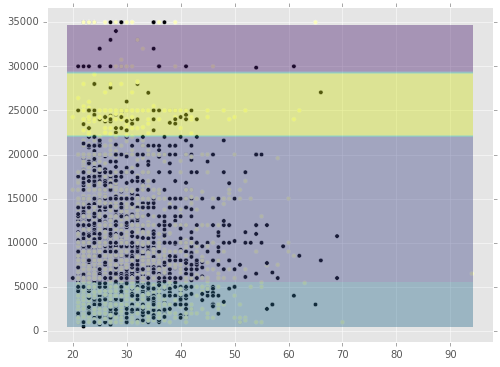

In [33]:
plot_boundaries(X, clf)

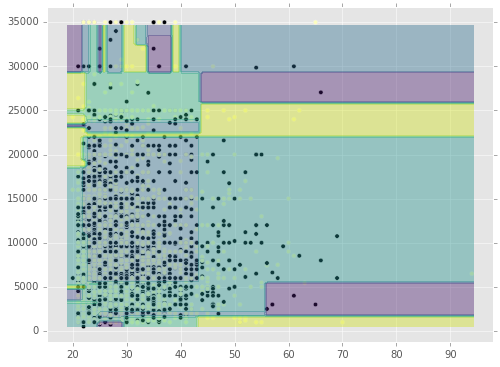

In [34]:
clf = tree.DecisionTreeClassifier(max_depth=6).fit(X,y)
plot_boundaries(X, clf)

## Model

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [36]:
X = df_encoded.iloc[:,1:]
y = df_encoded.iloc[:,0]

In [37]:
def cross_val(clf, k):
    kf = StratifiedKFold(n_splits=k)
    kfold_auc_score = []
    for train_index, test_index in kf.split(X,y):
        clf = clf.fit(X.iloc[train_index], y.iloc[train_index])
        dt_prediction = clf.predict_proba(X.iloc[test_index])[:,1]
        auc_score = roc_auc_score(y.iloc[test_index],dt_prediction)
        print(auc_score)
        kfold_auc_score.append(auc_score) 
    print("Mean K Fold CV:", np.mean(kfold_auc_score))

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier(n_estimators=100)
cross_val(clf, 5)

0.699151633023
0.683021762457
0.717225678856
0.775712937811
0.801059879053
Mean K Fold CV: 0.73523437824


## Hyperparameter tuning

In [40]:
df_encoded.head()

,default,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,0,1000,2.00,19200.00,24,0,1,0,0,0,0,0,0,0,0,1
1,1,6500,2.00,66000.00,28,1,0,0,0,0,0,0,1,0,0,0
2,0,2400,2.00,60000.00,36,1,0,0,0,0,0,0,0,0,0,1
3,0,10000,3.00,62000.00,24,0,0,1,0,0,0,0,0,0,0,1
4,1,4000,2.00,20000.00,28,0,0,1,0,0,0,0,0,0,0,1


In [41]:
y = df_encoded['default']
X = df_encoded.drop('default', axis=1)
clf = RandomForestClassifier(n_estimators=100)

In [42]:
cross_val(clf, 5)

0.702324626115
0.680111997854
0.716560001612
0.780408774516
0.792215521612
Mean K Fold CV: 0.734324184342


In [43]:
param_dist = {"max_depth": list(np.arange(2, 10)) + [None],
              "max_features": list(np.arange(2, 5)) + ['auto'],
              "min_samples_split": np.arange(2, 5),
              "min_samples_leaf": np.arange(1, 5),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [100, 500]}

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs=-1, verbose=3, cv=5,
                                   scoring='roc_auc')

In [46]:
# res = random_search.fit(X, y)

In [47]:
# res.best_score_

In [52]:
from xgboost import XGBClassifier

/Users/rafael/anaconda/envs/wattx/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
clf = XGBClassifier()

In [54]:
params = {
 'min_child_weight': np.arange(1, 10, 1),
 'n_estimators': [500, 1000, 2000, 3000],
 'learning_rate': [0.05, 0.1, 0.2, 0.3],
 'max_depth': np.arange(2, 10, 1),
 'subsample': [0.7, 0.8, 0.9, 1],
 'colsample_bytree': [0.9, 1.0]
}

In [55]:
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=params,
                                   n_iter=n_iter_search, n_jobs=-1, verbose=3, cv=5,
                                   scoring='roc_auc')

In [56]:
clf

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [57]:
res = random_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] min_child_weight=6, n_estimators=3000, colsample_bytree=1.0, subsample=1, learning_rate=0.1, max_depth=2 
[CV] min_child_weight=6, n_estimators=3000, colsample_bytree=1.0, subsample=1, learning_rate=0.1, max_depth=2 
[CV] min_child_weight=6, n_estimators=3000, colsample_bytree=1.0, subsample=1, learning_rate=0.1, max_depth=2 
[CV] min_child_weight=6, n_estimators=3000, colsample_bytree=1.0, subsample=1, learning_rate=0.1, max_depth=2 
[CV]  min_child_weight=6, n_estimators=3000, colsample_bytree=1.0, subsample=1, learning_rate=0.1, max_depth=2, score=0.645423, total=  10.6s
[CV] min_child_weight=6, n_estimators=3000, colsample_bytree=1.0, subsample=1, learning_rate=0.1, max_depth=2 
[CV]  min_child_weight=6, n_estimators=3000, colsample_bytree=1.0, subsample=1, learning_rate=0.1, max_depth=2, score=0.661977, total=  10.7s
[CV]  min_child_weight=6, n_estimators=3000, colsample_bytree=1.0, subsample=1, learning_rate=0.1, 

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min


[CV]  min_child_weight=8, n_estimators=500, colsample_bytree=1.0, subsample=0.7, learning_rate=0.3, max_depth=8, score=0.667932, total=   6.9s
[CV] min_child_weight=8, n_estimators=500, colsample_bytree=1.0, subsample=0.7, learning_rate=0.3, max_depth=8 
[CV]  min_child_weight=8, n_estimators=500, colsample_bytree=1.0, subsample=0.7, learning_rate=0.3, max_depth=8, score=0.656929, total=   6.9s
[CV] min_child_weight=8, n_estimators=500, colsample_bytree=1.0, subsample=0.7, learning_rate=0.3, max_depth=8 
[CV]  min_child_weight=8, n_estimators=500, colsample_bytree=1.0, subsample=0.7, learning_rate=0.3, max_depth=8, score=0.672354, total=   6.9s
[CV] min_child_weight=8, n_estimators=3000, colsample_bytree=0.9, subsample=1, learning_rate=0.1, max_depth=8 
[CV]  min_child_weight=8, n_estimators=3000, colsample_bytree=0.9, subsample=0.9, learning_rate=0.1, max_depth=3, score=0.746661, total=  15.0s
[CV] min_child_weight=8, n_estimators=3000, colsample_bytree=0.9, subsample=1, learning_rate

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.3min finished


In [58]:
res.best_score_

0.70362045957623864

In [59]:
res.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1.0,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=2000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.9)

## Save model

In [60]:
from sklearn.externals import joblib

joblib.dump(clf, "model.pkl")
# joblib.dump(le_grade, "le_grade.pkl")
# joblib.dump(le_ownership, "le_ownership.pkl");

['model.pkl']